# MetaKG Query API

The **MetaKG Query API** enables users to query the SmartAPI MetaKG, leveraging the Biolink Model's semantic structure to retrieve relationships between biomedical entities. This chapter explains how to use the API, its key parameters, and output formats.

---

## Introduction

The MetaKG Query API supports advanced queries using semantic descendants from the Biolink Model. It allows for highly customized searches by providing features like:

- Querying by **subject**, **object**, or **predicate**.
- Expanding terms with Biolink Model semantic descendants.
- Output in multiple formats (e.g., JSON, YAML, GraphML).
- Optional visualizations for graph data.

**Endpoint**: [`https://smart-api.info/api/metakg`](https://smart-api.info/api/metakg)

---

## Query Parameters

Below is a summary of the key parameters supported by the MetaKG Query API:

| **Parameter**       | **Description**                                                                 | **Type**  | **Default**   | **Additional Notes**                     |
|----------------------|---------------------------------------------------------------------------------|-----------|---------------|------------------------------------------|
| `subject`           | List of subject node identifiers to query.                                      | `list`    | `None`        | Max: 1000                                |
| `object`            | List of object node identifiers to query.                                       | `list`    | `None`        | Max: 1000                                |
| `predicate`         | List of edge predicates (relationships).                                        | `list`    | `None`        | Alias: `edge`, Max: 1000                |
| `expand`            | Expands terms into semantic descendants.                                        | `list`    | `[]`          | Options: `subject`, `object`, `all`|
| `format`            | Output format of the query.                                                     | `string`  | `json`        | Options: `json`, `yaml`, `graphml`, etc.|
| `html_view`         | Visualization format for HTML views.                                            | `string`  | `cytoscape`   | Options: `json`, `cytoscape`            |
| `size`              | Max number of results per query.                                                | `int`     | `5000`        | Alias: `limit`                           |
| `consolidated`      | Index switch setting                                                 | `bool`    | `True`        |                                          |
| `api_details`       | Includes additional API details in the response.                                | `bool`    | `False`       |                                          |

---



In [84]:
import requests
import pprint  

# Base URL for the MetaKG API
MKG_BASE_URL = "https://smart-api.info/api/metakg"

### Filtering Options

Filter with `subject`  
  
**Endpoint:** https://smart-api.info/api/metakg?subject=gene  

In [85]:
response = requests.get(f"{MKG_BASE_URL}?subject=Gene")
response.raise_for_status()
data = response.json()
print(data["total"])

1040


Filter with `object`  
  
**Endpoint:** 

In [86]:
response = requests.get(f"{MKG_BASE_URL}?object=Gene")
response.raise_for_status()
data = response.json()
print(data["total"])

922


Filter with `predicate`  
  
  
**Endpoint:**

In [87]:
response = requests.get(f"{MKG_BASE_URL}?predicate=associated_with")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data['hits'][0])

140
{'_id': 'Disease-associated_with-Cell',
 '_score': 0.0,
 'api': [{'name': 'Automat-ubergraph(Trapi v1.5.0)',
          'smartapi': {'id': 'dde0552a37fc136526216148ff7594a0'}},
         {'name': 'Automat-robokop(Trapi v1.5.0)',
          'smartapi': {'id': '4f9c8853b721ef1f14ecee6d92fc19b5'}}],
 'object': 'Cell',
 'predicate': 'associated_with',
 'subject': 'Disease'}


In [88]:
response = requests.get(f"{MKG_BASE_URL}?subject=gene&predicate=associated_with&object=gene")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data['hits'][0])

1
{'_id': 'Gene-associated_with-Gene',
 '_score': 0.0,
 'api': [{'name': 'MolePro',
          'smartapi': {'id': '1901bab8d33bb70b124f400ec1cfdba3'}}],
 'object': 'Gene',
 'predicate': 'associated_with',
 'subject': 'Gene'}


See more API details with `api_details`  
  
**Endpoint:**  

In [89]:
response = requests.get(f"{MKG_BASE_URL}?subject=gene&predicate=associated_with&object=gene&api_details")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data["hits"])

1
[{'_id': 'Gene-associated_with-Gene',
  '_score': 0.0,
  'api': [{'name': 'MolePro',
           'provided_by': None,
           'smartapi': {'id': '1901bab8d33bb70b124f400ec1cfdba3',
                        'metadata': 'https://raw.githubusercontent.com/NCATS-Tangerine/translator-api-registry/master/molecular_data_provider/MolePro-TRAPI-1.5.yaml',
                        'ui': 'https://smart-api.info/ui/1901bab8d33bb70b124f400ec1cfdba3'},
           'tags': ['meta_knowledge_graph',
                    'query',
                    'asyncquery',
                    'asyncquery_status',
                    'translator',
                    'trapi',
                    'bte-trapi'],
           'x-translator': {'component': 'KP',
                            'team': ['Molecular Data Provider']}}],
  'object': 'Gene',
  'predicate': 'associated_with',
  'subject': 'Gene'}]


See BTE details with `bte`  
  
**Endpoint:** 

In [90]:
response = requests.get(f"{MKG_BASE_URL}?subject=gene&predicate=associated_with&object=gene&bte=1")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data["hits"])

1
[{'_id': 'Gene-associated_with-Gene',
  '_score': 0.0,
  'api': [{'bte': {'query_operation': {'input_separator': ',',
                                       'method': 'post',
                                       'params': None,
                                       'path': '/query',
                                       'path_params': None,
                                       'request_body': None,
                                       'server': 'https://molepro-trapi.transltr.io/molepro/trapi/v1.5',
                                       'support_batch': True}},
           'name': 'MolePro',
           'smartapi': {'id': '1901bab8d33bb70b124f400ec1cfdba3'}}],
  'object': 'Gene',
  'predicate': 'associated_with',
  'subject': 'Gene'}]


In [16]:
response = requests.get(f"{BASE_URL}?q=api.smartapi.id:1901bab8d33bb70b124f400ec1cfdba3")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data["hits"])

828
[{'_id': 'Protein-part_of-MacromolecularComplex',
  '_score': 4.1633315,
  'api': [{'name': 'Complex Portal Web Service',
           'smartapi': {'id': '326eb1e437303bee27d3cef29227125d'}},
          {'name': 'MolePro',
           'smartapi': {'id': '1901bab8d33bb70b124f400ec1cfdba3'}},
          {'name': 'Service Provider TRAPI',
           'smartapi': {'id': '36f82f05705c317bac17ddae3a0ea2f0'}},
          {'name': 'BioThings Explorer (BTE) TRAPI',
           'smartapi': {'id': 'dc91716f44207d2e1287c727f281d339'}}],
  'object': 'MacromolecularComplex',
  'object_prefix': 'ComplexPortal',
  'predicate': 'part_of',
  'subject': 'Protein',
  'subject_prefix': 'UniProtKB'},
 {'_id': 'SmallMolecule-part_of-MacromolecularComplex',
  '_score': 4.1633315,
  'api': [{'name': 'Complex Portal Web Service',
           'smartapi': {'id': '326eb1e437303bee27d3cef29227125d'}},
          {'name': 'MolePro',
           'smartapi': {'id': '1901bab8d33bb70b124f400ec1cfdba3'}},
          {'name': 'Se

In [18]:
response = requests.get(f"{MKG_BASE_URL}?q=api.smartapi.id:1901bab8d33bb70b124f400ec1cfdba3&fields=_id")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data["hits"])

828
[{'_id': 'Protein-part_of-MacromolecularComplex', '_score': 4.1633315},
 {'_id': 'SmallMolecule-part_of-MacromolecularComplex', '_score': 4.1633315},
 {'_id': 'SmallMolecule-related_to-Gene', '_score': 4.1633315},
 {'_id': 'Gene-related_to-SmallMolecule', '_score': 4.1633315},
 {'_id': 'Disease-related_to-SmallMolecule', '_score': 4.1633315},
 {'_id': 'Pathway-has_participant-Gene', '_score': 4.1633315},
 {'_id': 'Gene-part_of-MacromolecularComplex', '_score': 4.1633315},
 {'_id': 'Gene-participates_in-Pathway', '_score': 4.1633315},
 {'_id': 'Pathway-has_participant-SmallMolecule', '_score': 4.1633315},
 {'_id': 'ChemicalEntity-subclass_of-ChemicalEntity', '_score': 4.1633315}]


In [20]:
response = requests.get(f"{MKG_BASE_URL}?q=api.smartapi.id:1901bab8d33bb70b124f400ec1cfdba3&subject=Pathway&predicate=has_participant&fields=_id")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data["hits"])

3
[{'_id': 'Pathway-has_participant-Gene', '_score': 4.1633315},
 {'_id': 'Pathway-has_participant-SmallMolecule', '_score': 4.1633315},
 {'_id': 'Pathway-has_participant-MolecularMixture', '_score': 4.1633315}]


#### Expand   
The `expand` option in the MetaKG API allows for retrieving semantic descendants of specific terms

`expand=subject`   
  
**Endpoint:** https://smart-api.info/api/metakg?subject=BiologicalEntity&object=BiologicalEntity&expand=subject&fields=subject,object

In [34]:
response = requests.get(f"{MKG_BASE_URL}?subject=BiologicalEntity&object=BiologicalEntity&expand=subject&fields=subject,object")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data['hits'])

187
[{'_id': 'Gene-genetically_associated_with-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Protein-genetically_associated_with-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Protein'},
 {'_id': 'Gene-affected_by-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Gene-interacts_with-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Gene-produces-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Gene-coexists_with-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Gene-affects-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Gene-derives_from-BiologicalEntity',
  '_score': 0.0,
  'object': 'BiologicalEntity',
  'subject': 'Gene'},
 {'_id': 'Gene-derives_

`&rawquery=1`

In [35]:
response = requests.get(f"{MKG_BASE_URL}?subject=BiologicalEntity&object=BiologicalEntity&expand=subject&rawquery=1")
response.raise_for_status()
data = response.json()
pprint.pprint(data)

{'query': {'bool': {'filter': [{'terms': {'subject': ['RegulatoryRegion',
                                                      'BiologicalProcessOrActivity',
                                                      'GeneticInheritance',
                                                      'OrganismalEntity',
                                                      'DiseaseOrPhenotypicFeature',
                                                      'Gene',
                                                      'MacromolecularComplex',
                                                      'NucleosomeModification',
                                                      'Genome',
                                                      'Exon',
                                                      'Transcript',
                                                      'CodingSequence',
                                                      'Polypeptide',
                                                   

`&expand=object`

In [43]:
response = requests.get(f"{MKG_BASE_URL}?subject=BiologicalEntity&object=BiologicalEntity&expand=object&fields=subject,object")
response.raise_for_status()
data = response.json()
print(data["total"])
pprint.pprint(data['hits'])

174
[{'_id': 'BiologicalEntity-genetically_associated_with-Gene',
  '_score': 0.0,
  'object': 'Gene',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-genetically_associated_with-Protein',
  '_score': 0.0,
  'object': 'Protein',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-part_of-Virus',
  '_score': 0.0,
  'object': 'Virus',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-preventative_for_condition-Virus',
  '_score': 0.0,
  'object': 'Virus',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-located_in-Virus',
  '_score': 0.0,
  'object': 'Virus',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-contains_process-Disease',
  '_score': 0.0,
  'object': 'Disease',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-preventative_for_condition-Disease',
  '_score': 0.0,
  'object': 'Disease',
  'subject': 'BiologicalEntity'},
 {'_id': 'BiologicalEntity-related_to-Disease',
  '_score': 0.0,
  'object': 'Disease',
  '

`&rawquery=1`

In [42]:
response = requests.get(f"{MKG_BASE_URL}?subject=BiologicalEntity&object=BiologicalEntity&expand=object&fields=subject,object&rawquery=1")
response.raise_for_status()
data = response.json()
pprint.pprint(data)

{'_source': {'excludes': [], 'includes': ['subject', 'object']},
 'query': {'bool': {'filter': [{'terms': {'subject': ['BiologicalEntity']}},
                               {'terms': {'object': ['RegulatoryRegion',
                                                     'BiologicalProcessOrActivity',
                                                     'GeneticInheritance',
                                                     'OrganismalEntity',
                                                     'DiseaseOrPhenotypicFeature',
                                                     'Gene',
                                                     'MacromolecularComplex',
                                                     'NucleosomeModification',
                                                     'Genome',
                                                     'Exon',
                                                     'Transcript',
                                                     'CodingS

Download a `.graphml` file with `format=graphml`  
*automatically downloads a file*  
    
**Endpoint:** https://smart-api.info/api/metakg?predicate=associated_with&format=graphml


In [97]:
# response = requests.get(f"{MKG_BASE_URL}?predicate=associated_with&format=graphml")


View a data in `graphml` with `format=graphml&download=0`  
  
**Endpoint:**  https://smart-api.info/api/metakg?predicate=associated_with&format=graphml&download=0

In [98]:

import networkx as nx
from io import StringIO

# Fetch the GraphML data
response = requests.get(f"{MKG_BASE_URL}?predicate=associated_with&format=graphml&download=0")
response.raise_for_status()

# Parse the GraphML data
graphml_data = response.text
print(graphml_data)

<!-- This GraphML export was generated from this SmartAPI MetaKG (Meta KnowledgeGraph) query: 

 	https://smart-api.info/api/metakg?predicate=associated_with&format=graphml&download=0 

 You can also change "format=graphml" parameter to "format=json"         to view a JSON output, or
"format=html" to view a visualization of the filtered MetaKG based on your query criteria. 

 Summary of the filtered MetaKG:             

	* Total no. of edges matched: 140 
	* Total no. of edges exported: 10 
	* Total no. of nodes exported: 7 

query (140). To export all matching edges, you may increase your "size" parameter (up to 5000). 
-->

<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <key id="d1" for="node" attr.name="label" attr.type="string" />
  <key id="d2" for="edge" attr.name="label" attr.type="string" />
  <graph i

Get the full data by adjusting the `size`   
  
**Endpoints:** https://smart-api.info/api/metakg?predicate=associated_with&format=graphml&download=0&size=1000  

       Metric  Count
0  Node Count     24
1  Edge Count    140


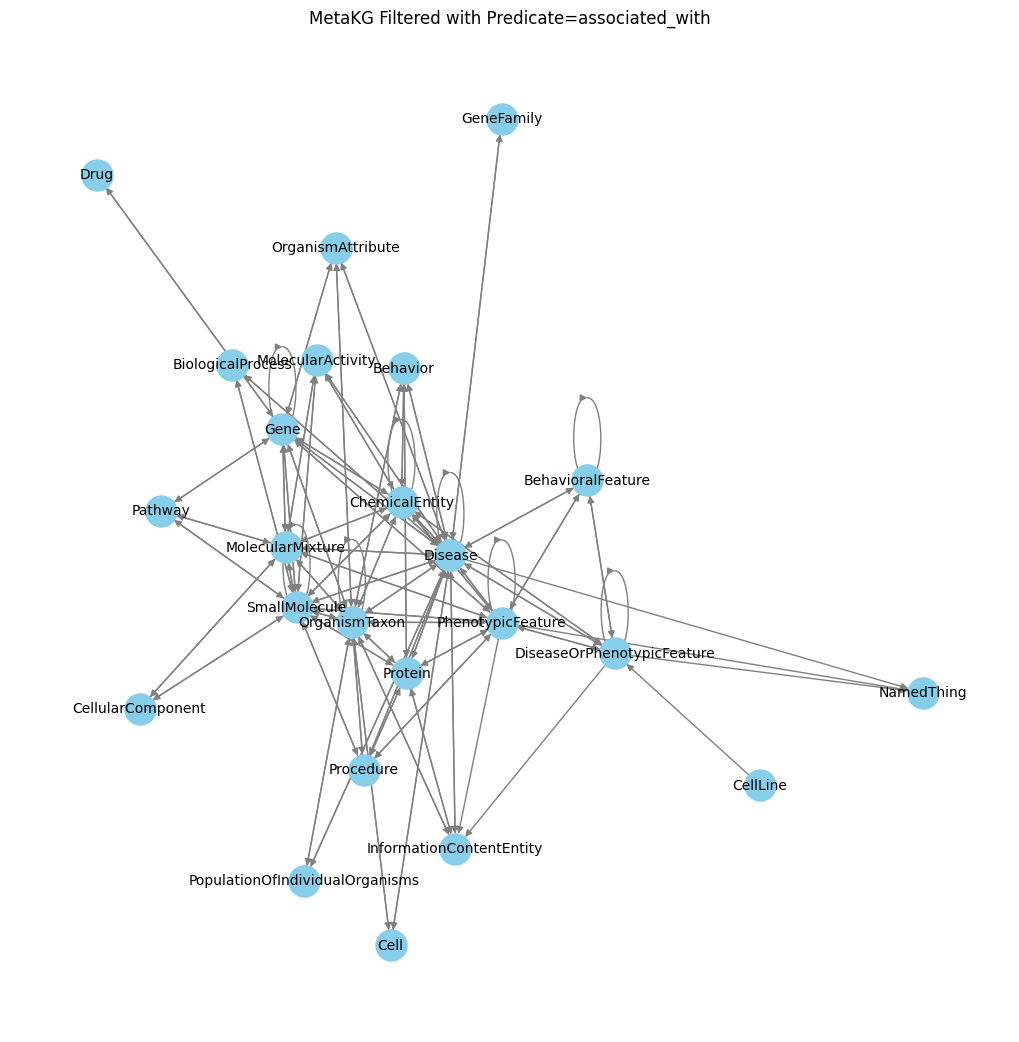

In [115]:

import networkx as nx
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd

# Fetch the GraphML data
response = requests.get(f"{MKG_BASE_URL}?predicate=associated_with&format=graphml&download=0&size=1000")
response.raise_for_status()

# Parse the GraphML data
graphml_data = response.text
# print(graphml_data)

# Parse the GraphML data
graphml_data = response.content

# Load the GraphML data into NetworkX
graph = nx.read_graphml(BytesIO(graphml_data))

# Print the graph information
node_count = graph.number_of_nodes()
edge_count = graph.number_of_edges()

# Display node and edge count in a table
data = {'Metric': ['Node Count', 'Edge Count'], 'Count': [node_count, edge_count]}
df = pd.DataFrame(data)
print(df)

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(graph, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
plt.title("MetaKG Filtered with Predicate=associated_with")
plt.show()



---
### Pathfinder  
Endpoint: 
**Endpoint:** https://smart-api.info/api/metakg/paths  
  
The `PathFinder` functionality in the MetaKG API allows you to query possible paths between biomedical entities such as genes, diseases, and drugs.  
  #### Key Attributes and Parameters

| **Parameter**   | **Description**                                                | **Type** | **Default** | **Notes**                                       |
|-----------------|----------------------------------------------------------------|----------|-------------|-------------------------------------------------|
| `subject`       | Starting entity identifier for the query.                     | `str`    | *Required*  | e.g., `gene`                                   |
| `object`        | Target entity identifier for the query.                       | `str`    | *Required*  | e.g., `disease`                                |
| `predicate`     | List of specific relationship types to filter the paths.      | `list`   | `[]`        | Max: 10                                        |
| `cutoff`        | Maximum number of edges (path length) to retrieve.            | `int`    | `3`         | Max: 5                                         |
| `api_details`   | Include detailed API metadata in the response.                | `bool`   | `False`     |                                                 |
| `rawquery`      | Return raw query results without formatting.                  | `bool`   | `False`     |                                                 |
| `bte`           | Enable Biomedical Translation Engine features.                | `bool`   | `False`     |                                                 |
| `expand`        | Expand query terms to include semantic descendants.           | `list`   | `[]`        | Options: `subject`, `object`, `predicate`, `node`, `edge`, `all` |


In [45]:
# Base URL for the PathFinder API
PF_BASE_URL = "https://smart-api.info/api/metakg/paths"

Base case -  
**Endpoint:** https://smart-api.info/api/metakg/paths?subject=BiologicalProcessOrActivity&object=ClinicalFinding

In [59]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path
    

41
{'edges': [{'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}}],
            'object': 'Cell',
            'predicate': 'related_to',
            'subject': 'BiologicalProcessOrActivity'},
           {'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}},
                    {'api': {'name': 'Automat-ubergraph(Trapi v1.5.0)',
                             'smartapi': {'id': 'dde0552a37fc136526216148ff7594a0'}}},
                    {'api': {'name': 'Automat-robokop(Trapi v1.5.0)',
                             'smartapi': {'id': '4f9c8853b721ef1f14ecee6d92fc19b5'}}},
                    {'api': {'name': 'RTX KG2 - TRAPI 1.5.0',
                             'smartapi': {'id': 'a6b575139cfd429b0a87f825a625d036'}}},
                    {'api': {'name': 'ARAX Translator Reasoner - TRAPI 1.

Filter with `predicate`  
      
**Endpoint:** https://smart-api.info/api/metakg/paths?subject=BiologicalProcessOrActivity&object=ClinicalFinding&predicate=associated_with  


In [60]:
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&predicate=associated_with")
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path

12
{'edges': [{'api': [{'api': {'name': 'MolePro',
                             'smartapi': {'id': '1901bab8d33bb70b124f400ec1cfdba3'}}},
                    {'api': {'name': 'Microbiome KP - TRAPI 1.5.0',
                             'smartapi': {'id': 'a8be4ea3fe8fa80a952ead0b3c5e4bc1'}}},
                    {'api': {'name': 'BioThings Explorer (BTE) TRAPI',
                             'smartapi': {'id': 'dc91716f44207d2e1287c727f281d339'}}}],
            'object': 'SmallMolecule',
            'predicate': 'associated_with',
            'subject': 'CellularComponent'}],
 'path': ['BiologicalProcessOrActivity',
          'CellularComponent',
          'SmallMolecule',
          'ClinicalFinding']}


Adjust path hops with `cutoff`  
  
**Endpoint:** https://smart-api.info/api/metakg/paths?subject=BiologicalProcessOrActivity&object=ClinicalFinding&cutoff=2

In [62]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&cutoff=2")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path
    

2
{'edges': [{'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}}],
            'object': 'Protein',
            'predicate': 'related_to',
            'subject': 'BiologicalProcessOrActivity'},
           {'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}}],
            'object': 'Protein',
            'predicate': 'enabled_by',
            'subject': 'BiologicalProcessOrActivity'},
           {'api': [{'api': {'name': 'Service Provider TRAPI',
                             'smartapi': {'id': '36f82f05705c317bac17ddae3a0ea2f0'}}},
                    {'api': {'name': 'BioThings Explorer (BTE) TRAPI',
                             'smartapi': {'id': 'dc91716f44207d2e1287c727f281d339'}}},
                    {'api': {'name': 'Multiomics Wellness KP API',
                             'sma

See more API details with `&api_details=1`

In [77]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&api_details=1")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path
    

41
{'edges': [{'api': [{'bte': {'query_operation': {'input_separator': ',',
                                                 'method': 'post',
                                                 'params': None,
                                                 'path': '/query',
                                                 'path_params': None,
                                                 'request_body': None,
                                                 'server': 'https://automat.transltr.io/monarch-kg',
                                                 'support_batch': True}},
                     'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                     'provided_by': None,
                     'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4',
                                  'metadata': 'https://trapi-openapi.apps.renci.org/trapi/infores:automat-monarchinitiative/1.5.0',
                                  'ui': 'https://smart-api.info/ui/6b88f83127513bd350e6

See BTE details with `&bte=1`

In [78]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&bte=1")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path
    

41
{'edges': [{'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}},
                     'bte': {'query_operation': {'input_separator': ',',
                                                 'method': 'post',
                                                 'params': None,
                                                 'path': '/query',
                                                 'path_params': None,
                                                 'request_body': None,
                                                 'server': 'https://automat.transltr.io/monarch-kg',
                                                 'support_batch': True}}}],
            'object': 'Cell',
            'predicate': 'related_to',
            'subject': 'BiologicalProcessOrActivity'},
           {'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartap

Expand Descendents with `expand`  

`&expand=subject`

In [68]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&expand=subject")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path

614
{'edges': [{'api': [{'api': {'name': 'Complex Portal Web Service',
                             'smartapi': {'id': '326eb1e437303bee27d3cef29227125d'}}},
                    {'api': {'name': 'Service Provider TRAPI',
                             'smartapi': {'id': '36f82f05705c317bac17ddae3a0ea2f0'}}},
                    {'api': {'name': 'BioThings Explorer (BTE) TRAPI',
                             'smartapi': {'id': 'dc91716f44207d2e1287c727f281d339'}}}],
            'object': 'MacromolecularComplex',
            'predicate': 'enabled_by',
            'subject': 'MolecularActivity'},
           {'api': [{'api': {'name': 'Automat-cam-kp(Trapi v1.5.0)',
                             'smartapi': {'id': '7ab0209ea8590341d8e5d0166cac3d2f'}}}],
            'object': 'MacromolecularComplex',
            'predicate': 'has_input',
            'subject': 'MolecularActivity'},
           {'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smart

`&expand=object`

In [67]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&expand=object")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path

41
{'edges': [{'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}}],
            'object': 'Cell',
            'predicate': 'related_to',
            'subject': 'BiologicalProcessOrActivity'},
           {'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}},
                    {'api': {'name': 'Automat-ubergraph(Trapi v1.5.0)',
                             'smartapi': {'id': 'dde0552a37fc136526216148ff7594a0'}}},
                    {'api': {'name': 'Automat-robokop(Trapi v1.5.0)',
                             'smartapi': {'id': '4f9c8853b721ef1f14ecee6d92fc19b5'}}},
                    {'api': {'name': 'RTX KG2 - TRAPI 1.5.0',
                             'smartapi': {'id': 'a6b575139cfd429b0a87f825a625d036'}}},
                    {'api': {'name': 'ARAX Translator Reasoner - TRAPI 1.

`&expand=predicate`  

**Endpoint:** https://smart-api.info/api/metakg/paths?subject=BiologicalProcessOrActivity&object=ClinicalFinding&predicate=related_to&expand=predicate

In [70]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&predicate=related_to&expand=predicate")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    print(data["total"])
    pprint.pprint(data["paths"][0]) # look at a single path

41
{'edges': [{'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}}],
            'object': 'Cell',
            'predicate': 'related_to',
            'subject': 'BiologicalProcessOrActivity'},
           {'api': [{'api': {'name': 'Automat-monarchinitiative(Trapi v1.5.0)',
                             'smartapi': {'id': '6b88f83127513bd350e6962218ea84f4'}}},
                    {'api': {'name': 'Automat-ubergraph(Trapi v1.5.0)',
                             'smartapi': {'id': 'dde0552a37fc136526216148ff7594a0'}}},
                    {'api': {'name': 'Automat-robokop(Trapi v1.5.0)',
                             'smartapi': {'id': '4f9c8853b721ef1f14ecee6d92fc19b5'}}},
                    {'api': {'name': 'RTX KG2 - TRAPI 1.5.0',
                             'smartapi': {'id': 'a6b575139cfd429b0a87f825a625d036'}}},
                    {'api': {'name': 'ARAX Translator Reasoner - TRAPI 1.

`&rawquery=1`

In [76]:
# Make the API request
response = requests.get(f"{PF_BASE_URL}?subject=BiologicalProcessOrActivity&object=ClinicalFinding&predicate=related_to&expand=predicate&rawquery=1")
# Check if the response is successful
if response.status_code == 200:
    data = response.json()
    pprint.pprint(data)

{'expansion_logic': {'expand_object': False,
                     'expand_predicate': True,
                     'expand_subject': False},
 'input_parameters': {'object': 'ClinicalFinding',
                      'predicate': ['related_to'],
                      'subject': 'BiologicalProcessOrActivity'},
 'search_criteria': [{'description': "Expanding 'subject' to include 1 "
                                     'variant(s)',
                      'field': 'subject',
                      'values': ['BiologicalProcessOrActivity']},
                     {'description': "Expanding 'object' to include 1 "
                                     'variant(s)',
                      'field': 'object',
                      'values': ['ClinicalFinding']},
                     {'description': "Expanding 'predicate' to include 229 "
                                     'variant(s)',
                      'field': 'predicate',
                      'values': ['related_to_at_concept_level',
        